A) Reading data and plotting it

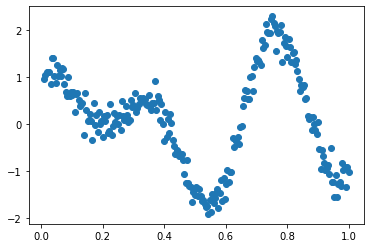

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('p1_dataset/data1_Signal.csv')
x, y = df['x'], df['y']

plt.scatter(x, y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Report

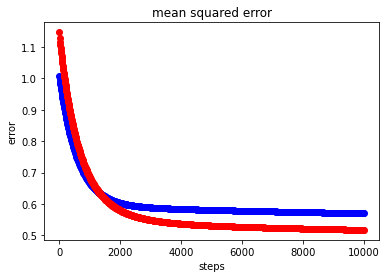

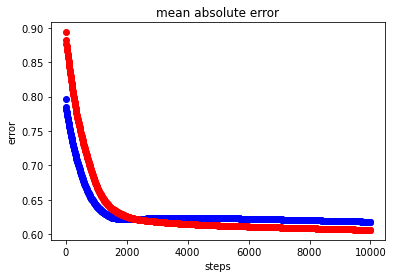

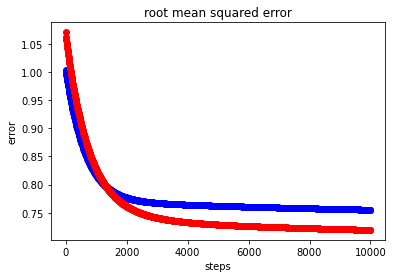

for the degree 7 and 10 iterations the errors for training set are MSE = 0.5705688577845927, MAE = 0.6180870291684795 and RMSE = 0.7553600848499956 and the errors for test set are MSE = 0.5177305602565758, MAE = 0.6061929926843497 and RMSE = 0.7195349611079199


In [9]:
%run ../regression.ipynb

reg = regression(7)
reg.track_overfitting(np.array(X_train).reshape(len(X_train), 1), np.array(X_test).reshape(len(X_test), 1), np.array(y_train), np.array(y_test), 0.6, 10000, 10)

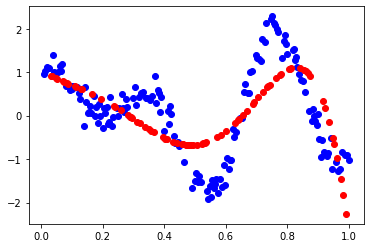

In [10]:
reg = regression(5, method='normal_equation')
reg.train(np.array(X_train).reshape(len(X_train), 1), y_train)

plt.scatter(X_train, y_train, c='blue')
plt.scatter(X_test, reg.predict(np.array(X_test).reshape(len(X_test), 1)), c='red')
plt.show()

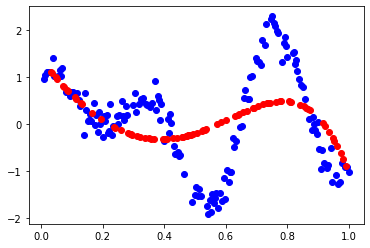

In [11]:
reg = regression(5)
reg.train(np.array(X_train).reshape(len(X_train), 1), y_train, learning_rate=0.2)

plt.scatter(X_train, y_train, c='blue')
plt.scatter(X_test, reg.predict(np.array(X_test).reshape(len(X_test), 1)), c='red')
plt.show()

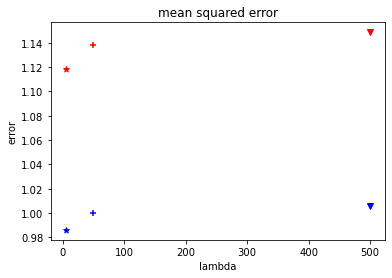

In [12]:
%run ../regression.ipynb

lambdas = [5, 50, 500]
markers = ['*', '+', 'v']

for lam, m in zip(lambdas, markers):
    reg = regression(5, method='normal_equation')
    reg.train(np.array(X_train).reshape(len(X_train), 1), y_train, lam=lam)
    
    y_train_predicted = reg.predict(np.array(X_train).reshape(len(X_train), 1))
    train_error = mean_squared_error(y_train, y_train_predicted)
    
    y_test_predicted = reg.predict(np.array(X_test).reshape(len(X_test), 1))
    test_error = mean_squared_error(y_test, y_test_predicted)
    
    plt.scatter(lam, train_error, c='blue', marker=m)
    plt.scatter(lam, test_error, c='red', marker=m)
    plt.title('mean squared error')
    plt.xlabel('lambda')
    plt.ylabel('error')

plt.show()